In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
X = df.drop('MedHouseVal', axis=1)   # Multiple independent variables
y = df['MedHouseVal']                # Target variable


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [ ]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred_mlr = mlr.predict(X_test)

print("Multiple Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred_mlr))
print("R2 Score:", r2_score(y_test, y_pred_mlr))


Multiple Linear Regression
MSE: 0.5558915986952444
R2 Score: 0.5757877060324508


In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


Ridge()

In [ ]:
y_pred_ridge = ridge.predict(X_test)

print("\nRidge Regression")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))



Ridge Regression
MSE: 0.5558034669932211
R2 Score: 0.5758549611440126


In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)


Lasso(alpha=0.01)

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Multiple LR': mlr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})

coefficients


,Feature,Multiple LR,Ridge,Lasso
0,MedInc,0.448675,0.448511,4.088956e-01
1,HouseAge,0.009724,0.009726,1.030849e-02
2,AveRooms,-0.123323,-0.123014,-4.744454e-02
3,AveBedrms,0.783145,0.781417,3.633460e-01
4,Population,-0.000002,-0.000002,-3.086013e-07
5,AveOccup,-0.003526,-0.003526,-3.359456e-03
6,Latitude,-0.419792,-0.419787,-4.071099e-01
7,Longitude,-0.433708,-0.433681,-4.149332e-01


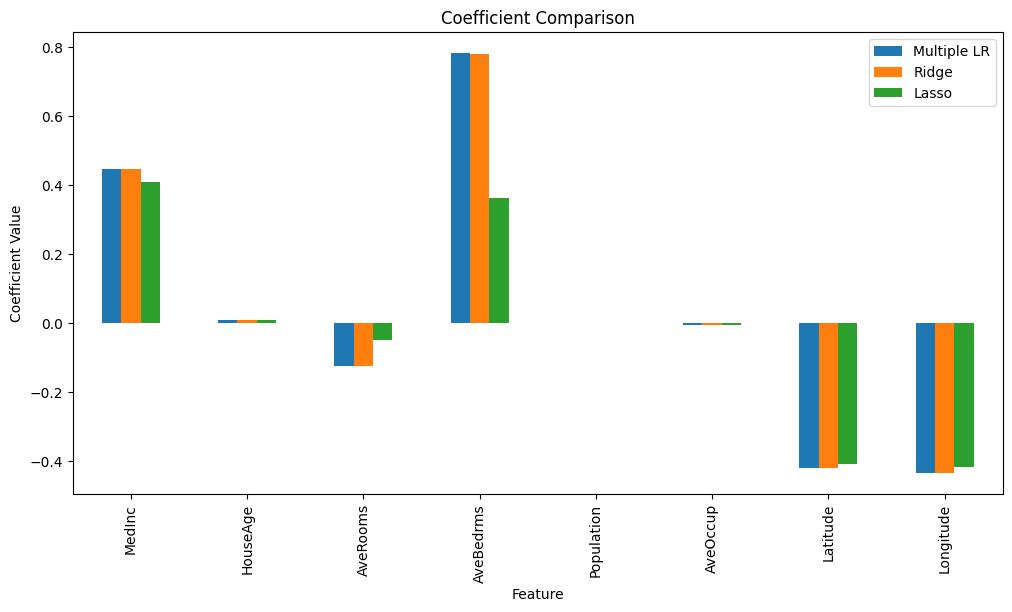

In [ ]:
coefficients.set_index('Feature').plot(kind='bar', figsize=(12,6))
plt.title("Coefficient Comparison")
plt.ylabel("Coefficient Value")
plt.show()
